In [71]:
import pandas
import numpy

In [72]:
df=pandas.read_csv(r"D:\Estudiar\Python\MLData\ml-100k\u.data.csv",sep="\t",header=None)

In [73]:
df.head()

,0,1,2,3
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [74]:
df.columns=["user_id","item_id","rating","timestamp"]

In [75]:
#analisis exploratorio de los items 

In [76]:
import matplotlib.pyplot as plt

(array([ 6110.,     0., 11370.,     0.,     0., 27145.,     0., 34174.,
            0., 21201.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

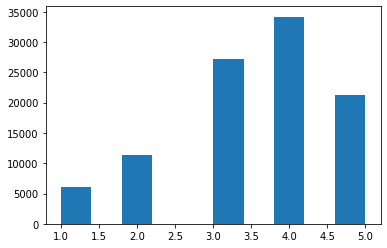

In [77]:
plt.hist(df.rating)

In [78]:
df.groupby(["rating"])["user_id"].count()

rating
1     6110
2    11370
3    27145
4    34174
5    21201
Name: user_id, dtype: int64

(array([1.146e+03, 2.490e+02, 1.390e+02, 6.700e+01, 3.800e+01, 2.400e+01,
        7.000e+00, 5.000e+00, 6.000e+00, 1.000e+00]),
 array([  1. ,  59.2, 117.4, 175.6, 233.8, 292. , 350.2, 408.4, 466.6,
        524.8, 583. ]),
 <BarContainer object of 10 artists>)

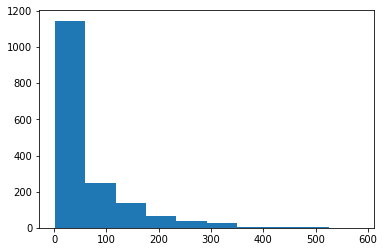

In [79]:
plt.hist(df.groupby(["item_id"])["user_id"].count())

In [80]:
#representacion en forma matricial

In [81]:
n_users=df.user_id.unique().shape[0]
n_items=df.item_id.unique().shape[0]

In [82]:
ratings=numpy.zeros([n_users,n_items])

In [83]:
for row in df.itertuples():
    ratings[row[1]-1,row[2]-1]=row[3]

In [84]:
ratings

array([[5., 3., 4., ..., 0., 0., 0.],
       [4., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [5., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 5., 0., ..., 0., 0., 0.]])

In [85]:
sparsity=float(len(ratings.nonzero()[0]))
sparsity /= (ratings.shape[0]*ratings.shape[1])
sparsity *=100
print("coeficiente de sparseidad: {:4.2f}%".format(sparsity))

coeficiente de sparseidad: 6.30%


In [86]:
#Crear conjuntos de entrenamiento y validacion 

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
ratings_train,ratings_test=train_test_split(ratings,test_size=0.3,random_state=42)

In [24]:
#filtro colaborativo basado en usuarios 
##matriz de similaridad entre los usuarios    (distancia del coseno)
##predecir la valoracion desconocida de un item *i* para un usuario activo *U* basandonos en la suma ponderada de todas las valoraciones del resto de usuarios para dicho tema
##recomendaremos los nuevos items a los usuarios segun lo establecido en los pasos anteriores 

In [25]:
import numpy
import sklearn

In [26]:
sim_matrix=1-sklearn.metrics.pairwise.cosine_distances(ratings_train)

In [27]:
sim_matrix

array([[1.        , 0.17448349, 0.18009754, ..., 0.13331459, 0.17695593,
        0.21882481],
       [0.17448349, 1.        , 0.07993097, ..., 0.07175808, 0.09552622,
        0.05512655],
       [0.18009754, 0.07993097, 1.        , ..., 0.0191736 , 0.02233385,
        0.10310785],
       ...,
       [0.13331459, 0.07175808, 0.0191736 , ..., 1.        , 0.04853428,
        0.05142508],
       [0.17695593, 0.09552622, 0.02233385, ..., 0.04853428, 1.        ,
        0.1198022 ],
       [0.21882481, 0.05512655, 0.10310785, ..., 0.05142508, 0.1198022 ,
        1.        ]])

In [28]:
user_predictions=sim_matrix.dot(ratings_train)/numpy.array([numpy.abs(sim_matrix).sum(axis=1)]).T

In [29]:
user_predictions

array([[2.10259747e+00, 5.86975978e-01, 3.40264192e-01, ...,
        0.00000000e+00, 7.33611460e-03, 6.04379414e-03],
       [1.40999723e+00, 2.91863934e-01, 2.68085289e-01, ...,
        0.00000000e+00, 3.50378592e-03, 2.32963985e-03],
       [1.69014833e+00, 3.13648440e-01, 3.26127887e-01, ...,
        0.00000000e+00, 3.25391767e-03, 1.77210119e-03],
       ...,
       [1.73393747e+00, 4.06719333e-01, 3.21166908e-01, ...,
        0.00000000e+00, 2.71269625e-03, 9.00511411e-03],
       [2.34361031e+00, 8.10544770e-01, 4.73941025e-01, ...,
        0.00000000e+00, 1.01130066e-02, 9.66427605e-03],
       [2.36796969e+00, 5.98146138e-01, 3.85569804e-01, ...,
        0.00000000e+00, 6.39996638e-03, 5.37442746e-03]])

In [30]:
from sklearn.metrics import mean_squared_error

In [31]:
def get_mse(preds,actuals):
    preds=preds[actuals.nonzero()].flatten()
    actuals=actuals[actuals.nonzero()].flatten()
    return mean_squared_error(preds,actuals)

In [32]:
get_mse(user_predictions,ratings_train)

7.878218313143215

Cuando utilizamos el conjunto de test en la clase anterior (y en la siguiente) giro sin querer el algoritmo de evaluación

En el vídeo comparo las predicciones realizadas para ratings_train (que no tienen nada que ver con el conjunto de test) con el valor real del conjunto ratings_test.

Por contra, lo suyo sería hacer primero la predicción de los usuarios de ratings_test basándonos en los KNN del conjunto ratings_train, es decir buscando para cada usuario de ratings_test, los K usuarios más cercanos del conjunto de ratings_train y elaborar la predicción con el voto por mayoría de esos valores. Una vez lo tengamos, si que podemos elaborar el MSE con dichas predicciones y los valores reales de ratings_test.

Fíjate que la idea es siempre la misma:

Se crea el modelo con el conjunto de entrenamiento

Se utiliza el modelo creado para evaluar la predicción en el conjunto de test

Se mide qué tan bien lo ha hecho el modelo (por ejemplo usando el MSE o una matriz de confusión)

In [33]:
#Filtro colaborativo basado en los KNN

In [34]:
from sklearn.neighbors import NearestNeighbors

In [35]:
k=10

In [36]:
neighbors=NearestNeighbors(k,"cosine")

In [38]:
neighbors.fit(ratings_train)

NearestNeighbors(n_neighbors=10, radius='cosine')

In [39]:
top_k_distances, top_k_users=neighbors.kneighbors(ratings_train,return_distance=True)

In [40]:
users_predicts_k=numpy.zeros(ratings_train.shape)
for i in range(ratings_train.shape[0]): #para cada usuario dek conjunto de entrenamiento
    users_predicts_k[i,:]=top_k_distances[i].T.dot(ratings_train[top_k_users][i]) / numpy.array([numpy.abs(top_k_distances[i].T).sum(axis=0)]).T


In [44]:
n_movies=ratings_train.shape[1]

In [45]:
neighbors=NearestNeighbors(n_movies,"cosine")

In [46]:
neighbors.fit(ratings_train.T)

NearestNeighbors(n_neighbors=1682, radius='cosine')

In [48]:
top_k_distances, top_k_items=neighbors.kneighbors(ratings_train.T,return_distance=True)

In [49]:
item_preds=ratings_train.dot(top_k_distances) / numpy.array([numpy.abs(top_k_distances).sum(axis=1)])

In [50]:
item_preds.shape

(660, 1682)

In [51]:
#filtrado colaborativo basado en KNN

In [99]:
k=30
neighbors=NearestNeighbors(k,"cosine")
neighbors.fit(ratings_train.T)
top_k_distances, top_k_items=neighbors.kneighbors(ratings_train.T,return_distance=True)

In [101]:
preds=numpy.zeros(ratings_train.T.shape)
for i in range(ratings_train.T.shape[0]):
    preds[i,:]=top_k_distances[i].dot(ratings_train.T[top_k_items][i]) / numpy.array([numpy.abs(top_k_distances[i]).sum(axis=0)]).T

KeyboardInterrupt: 